In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import time

from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv('LondonTrajectoriesDataset.csv')

In [3]:
dataset

,ID,crimeNorm,accidentNorm,natureNorm,attractionNorm,durationNorm,trafficNorm,lengthNorm,setID,crimes,accidents,attractions,nature,traffic,duration,length,coordinates
0,0.0,1.000000,1.000000,1.000000,0.0,0.850299,0.902928,0.943543,0.0,93945.0,3.0,0.0,159627.730267,0.936027,594.0,4386.0,-0.189227:51.608657;-0.18897:51.60881;-0.18947...
1,1.0,0.827466,0.083333,0.655719,0.0,0.610778,0.968484,0.734651,0.0,95832.0,14.0,0.0,150019.960244,0.940063,634.0,4682.0,-0.189227:51.608657;-0.18897:51.60881;-0.18947...
2,2.0,0.663070,1.000000,0.172519,0.0,1.000000,1.000000,1.000000,0.0,97630.0,3.0,0.0,136535.383810,0.942004,569.0,4306.0,-0.189227:51.608657;-0.18897:51.60881;-0.18947...
3,3.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,104882.0,15.0,0.0,131720.927792,0.880435,736.0,5723.0,-0.189227:51.608657;-0.18897:51.60881;-0.18947...
4,4.0,1.000000,1.000000,0.061683,0.0,1.000000,1.000000,0.547141,1.0,108461.0,3.0,0.0,140749.174738,0.926582,790.0,5785.0,0.05167:51.651006;0.05391:51.65157;0.05433:51....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,3166.0,0.471464,0.589744,1.000000,0.0,0.000000,0.535208,1.000000,599.0,119890.0,86.0,0.0,667051.802766,0.868759,1402.0,12234.0,-0.3148:51.38421;-0.31478:51.38416;-0.31477:51...
3167,3167.0,0.759268,1.000000,0.045809,1.0,0.493333,1.000000,0.000000,599.0,88488.0,70.0,2.0,442868.647098,0.925040,1254.0,17589.0,-0.3148:51.38421;-0.31478:51.38416;-0.31477:51...
3168,3168.0,0.138238,0.871795,0.000000,1.0,0.170000,0.072508,0.155742,599.0,156248.0,75.0,2.0,432106.118161,0.812731,1351.0,16755.0,-0.3148:51.38421;-0.31478:51.38416;-0.31477:51...
3169,3169.0,0.000000,0.769231,0.126673,1.0,0.286667,0.000000,0.175350,599.0,171331.0,79.0,2.0,461867.359785,0.803951,1316.0,16650.0,-0.3148:51.38421;-0.31478:51.38416;-0.31477:51...


In [4]:
df = pd.DataFrame(data=dataset, columns=dataset.columns)

In [5]:
df.dropna(how='any',axis=0, inplace=True) 

In [6]:
df.drop(['coordinates'], axis=1, inplace=True)

In [7]:
df.columns

Index(['ID', 'crimeNorm', 'accidentNorm', 'natureNorm', 'attractionNorm',
       'durationNorm', 'trafficNorm', 'lengthNorm', 'setID', 'crimes',
       'accidents', 'attractions', 'nature', 'traffic', 'duration', 'length'],
      dtype='object')

## Standardising the dataset

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [9]:
df_scaled.reset_index(drop=True, inplace=True)
df_scaled

,ID,crimeNorm,accidentNorm,natureNorm,attractionNorm,durationNorm,trafficNorm,lengthNorm,setID,crimes,accidents,attractions,nature,traffic,duration,length
0,0.000000,1.000000,1.000000,1.000000,0.0,0.850299,0.902928,0.943543,0.000000,0.026788,0.000000,0.000000,0.044779,0.888351,0.020955,0.035581
1,0.000316,0.827466,0.083333,0.655719,0.0,0.610778,0.968484,0.734651,0.000000,0.027377,0.011011,0.000000,0.042083,0.896089,0.029968,0.040613
2,0.000631,0.663070,1.000000,0.172519,0.0,1.000000,1.000000,1.000000,0.000000,0.027938,0.000000,0.000000,0.038301,0.899809,0.015322,0.034221
3,0.000947,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.030200,0.012012,0.000000,0.036950,0.781773,0.052952,0.058311
4,0.001262,1.000000,1.000000,0.061683,0.0,1.000000,1.000000,0.547141,0.001669,0.031317,0.000000,0.000000,0.039483,0.870244,0.065119,0.059365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,0.998738,0.899037,0.000000,0.339443,1.0,0.246667,0.717342,0.470028,1.000000,0.020328,0.106106,0.083333,0.143586,0.801670,0.186345,0.217245
3166,0.999053,0.471464,0.589744,1.000000,0.0,0.000000,0.535208,1.000000,1.000000,0.034883,0.083083,0.000000,0.187121,0.759388,0.203019,0.168999
3167,0.999369,0.759268,1.000000,0.045809,1.0,0.493333,1.000000,0.000000,1.000000,0.025086,0.067067,0.083333,0.124233,0.867287,0.169671,0.260034
3168,0.999684,0.138238,0.871795,0.000000,1.0,0.170000,0.072508,0.155742,1.000000,0.046226,0.072072,0.083333,0.121214,0.651975,0.191528,0.245856


In [10]:
df.drop(['setID', 'crimeNorm', 'accidentNorm', 'natureNorm', 'attractionNorm', 'durationNorm', 'trafficNorm', 'lengthNorm'], axis=1, inplace=True)

In [11]:
target = pd.DataFrame(data=df['crimes'], columns=['crimes'])
df.drop(['crimes'], axis=1, inplace=True)

In [12]:
from sklearn import metrics

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, target, 
                                                    train_size = 0.7, random_state = 20)

## setting crimes as the target

In [14]:
target

,crimes
0,93945.0
1,95832.0
2,97630.0
3,104882.0
4,108461.0
...,...
3165,73238.0
3166,119890.0
3167,88488.0
3168,156248.0


In [15]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print('Training data r-squared', regr.score(x_train, y_train))
print('Test data r-squared', regr.score(x_test, y_test))
regr = regr.score(x_test, y_test)*100

Training data r-squared 0.7892539085465138
Test data r-squared 0.7626160493159014
Wall time: 59.8 ms


In [16]:
regr

76.26160493159014

In [17]:
regr_time = 0.032

In [18]:
np.ravel(y_pred).shape

(951,)

In [19]:
regr_mse = metrics.mean_squared_error(y_test.values.flatten(), np.ravel(y_pred))

In [20]:
regr_r2 = metrics.r2_score(y_test.values.flatten(), np.ravel(y_pred))

In [63]:
regr_mae = metrics.mean_absolute_error(y_test.values.flatten(), np.ravel(y_pred))

### Decision Tree

In [21]:
%%time
from sklearn import tree

tree_model = tree.DecisionTreeRegressor()
tree_model.fit(x_train, y_train)

Wall time: 80 ms


DecisionTreeRegressor()

In [22]:
predictions = tree_model.predict(x_test)
print(tree_model.score(x_test, y_test))
tree = tree_model.score(x_test, y_test)*100
metrics.precision_score(y_test, predictions, average='micro')

0.6848345367147968


0.0

In [23]:
tree

68.48345367147968

In [24]:
tree_time = 0.0625

In [25]:
tree_mse = metrics.mean_squared_error(y_test.values.flatten(), np.ravel(predictions))

In [26]:
tree_r2 = metrics.r2_score(y_test.values.flatten(), np.ravel(predictions))

In [64]:
tree_mae = metrics.mean_absolute_error(y_test.values.flatten(), np.ravel(predictions))

### Random Forest

In [27]:
%%time
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(x_train, y_train)

<timed exec>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Wall time: 906 ms


RandomForestRegressor()

In [28]:
predictions_rfr = rfr.predict(x_test)
rfr = rfr.score(x_test, y_test)*100

In [29]:
rfr

84.44626289378485

In [30]:
rfr_time = 0.873

In [31]:
rfr_mse = metrics.mean_squared_error(y_test.values.flatten(), np.ravel(predictions_rfr))
rfr_mse

20255875652.35765

In [32]:
rfr_r2 = metrics.r2_score(y_test.values.flatten(), np.ravel(predictions_rfr))

In [65]:
rfr_mae = metrics.mean_absolute_error(y_test.values.flatten(), np.ravel(predictions_rfr))

## K neighbours

In [33]:
from sklearn import neighbors
from math import sqrt

In [34]:
%%time
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 399822.75245706545
RMSE value for k=  2 is: 368132.2108309641
RMSE value for k=  3 is: 358892.9879039989
RMSE value for k=  4 is: 354581.1808434874
RMSE value for k=  5 is: 354862.39747481624
RMSE value for k=  6 is: 356083.6222601125
RMSE value for k=  7 is: 356334.0529433538
RMSE value for k=  8 is: 353682.33748570795
RMSE value for k=  9 is: 353282.2892587203
RMSE value for k=  10 is: 353450.88950602873
RMSE value for k=  11 is: 353499.02497844864
RMSE value for k=  12 is: 355420.95719428174
RMSE value for k=  13 is: 355441.5236756431
RMSE value for k=  14 is: 356496.5218064166
RMSE value for k=  15 is: 356618.0609651842
RMSE value for k=  16 is: 356925.02855420567
RMSE value for k=  17 is: 356692.01183053636
RMSE value for k=  18 is: 357254.7372265088
RMSE value for k=  19 is: 357956.6452800262
RMSE value for k=  20 is: 358572.3300294183
Wall time: 248 ms


In [35]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [36]:
%%time
neigh = neighbors.KNeighborsRegressor(n_neighbors = 9)
neigh.fit(x_train, y_train)

Wall time: 5.53 ms


KNeighborsRegressor(n_neighbors=9)

In [37]:
predictions_neigh = neigh.predict(x_test)
k_neigh = neigh.score(x_test, y_test)*100

In [38]:
k_neigh

4.164268147217198

In [39]:
neigh_time = 0.0089

In [40]:
neigh_mse = metrics.mean_squared_error(y_test.values.flatten(), np.ravel(predictions_neigh))
neigh_mse

124808375903.88211

In [41]:
neigh_r2 = metrics.r2_score(y_test.values.flatten(), np.ravel(predictions_neigh))

In [66]:
neigh_mae = metrics.mean_absolute_error(y_test.values.flatten(), np.ravel(predictions_neigh))

## Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
gaus_model = GaussianNB()

In [43]:
%%time
gaus_model.fit(x_train, y_train)

Wall time: 173 ms


C:\Users\91977\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [44]:
gaus_time = 0.95

In [45]:
predictions_gaus = gaus_model.predict(x_test)
gaus = gaus_model.score(x_test, y_test)*100

In [46]:
gaus

0.10515247108307045

In [47]:
gaus_mse = metrics.mean_squared_error(y_test.values.flatten(), np.ravel(predictions_gaus))
gaus_mse

187013303106.00842

In [48]:
gaus_r2 = metrics.r2_score(y_test.values.flatten(), np.ravel(predictions_gaus))

In [49]:
gaus_r2

-0.4360059282538218

In [67]:
gaus_mae = metrics.mean_absolute_error(y_test.values.flatten(), np.ravel(predictions_gaus))

## Plotting

In [50]:
accuracy_score = np.array([regr, tree, rfr, k_neigh, gaus])
column_names = np.array(['Regression', 'Decision Tree', 'Random Forest', 'K Neighbours', 'Naive Bayes'])
finals = pd.DataFrame([accuracy_score], columns=column_names)
accuracy_score

array([76.26160493, 68.48345367, 84.44626289,  4.16426815,  0.10515247])

In [51]:
fitting_time  = np.array([regr_time, tree_time, rfr_time, neigh_time, gaus_time])

In [53]:
MSE = np.array([regr_mse, tree_mse, rfr_mse, neigh_mse, gaus_mse])

In [54]:
r2 = np.array([regr_r2, tree_r2, rfr_r2, neigh_r2, gaus_r2])

In [70]:
MAE = np.array([regr_mae, tree_mae, rfr_mae, neigh_mae, gaus_mae])

In [71]:
finals

,Regression,Decision Tree,Random Forest,K Neighbours,Naive Bayes
0,3.091488e+10,4.104449e+10,2.025588e+10,1.248084e+11,1.870133e+11
1,3.200000e-02,6.250000e-02,8.730000e-01,8.900000e-03,9.500000e-01
2,7.626160e-01,6.848345e-01,8.444626e-01,4.164268e-02,-4.360059e-01
3,7.626160e+01,6.848345e+01,8.444626e+01,4.164268e+00,1.051525e-01


In [72]:
finals.loc[-1] = MAE  # adding a row
finals.index = finals.index + 1  # shifting index
finals = finals.sort_index()  #

In [73]:
finals

,Regression,Decision Tree,Random Forest,K Neighbours,Naive Bayes
0,1.254678e+05,1.383147e+05,1.007456e+05,2.435919e+05,2.664270e+05
1,3.091488e+10,4.104449e+10,2.025588e+10,1.248084e+11,1.870133e+11
2,3.200000e-02,6.250000e-02,8.730000e-01,8.900000e-03,9.500000e-01
3,7.626160e-01,6.848345e-01,8.444626e-01,4.164268e-02,-4.360059e-01
4,7.626160e+01,6.848345e+01,8.444626e+01,4.164268e+00,1.051525e-01


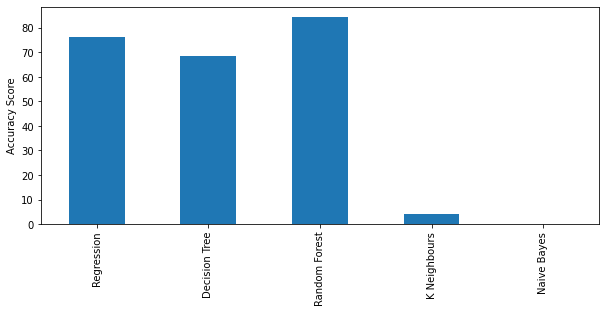

In [74]:
row = finals.iloc[4]
plt.figure(figsize=(10, 4))
row.plot(kind='bar')
plt.ylabel('Accuracy Score')
plt.show()

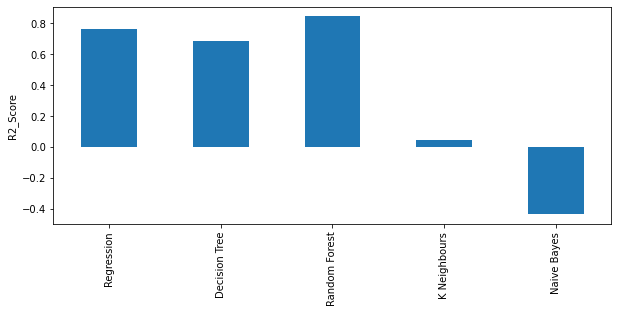

In [75]:
row = finals.iloc[3]
plt.figure(figsize=(10, 4))
row.plot(kind='bar')
plt.ylabel('R2_Score')
plt.show()

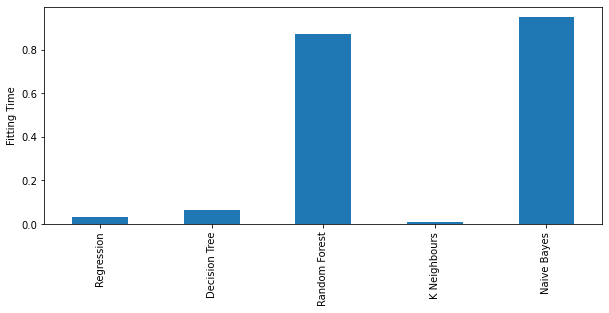

In [76]:
row = finals.iloc[2]
plt.figure(figsize=(10, 4))
row.plot(kind='bar')
plt.ylabel('Fitting Time')
plt.show()

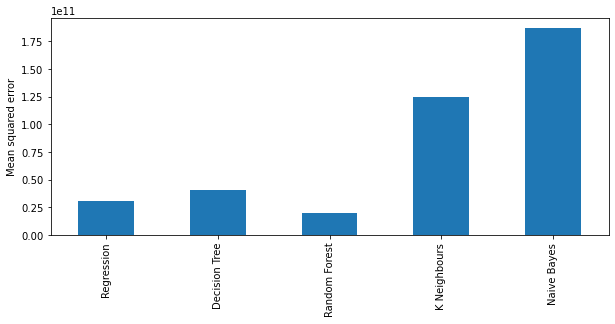

In [77]:
row = finals.iloc[1]
plt.figure(figsize=(10, 4))
row.plot(kind='bar')
plt.ylabel('Mean squared error')
plt.show()

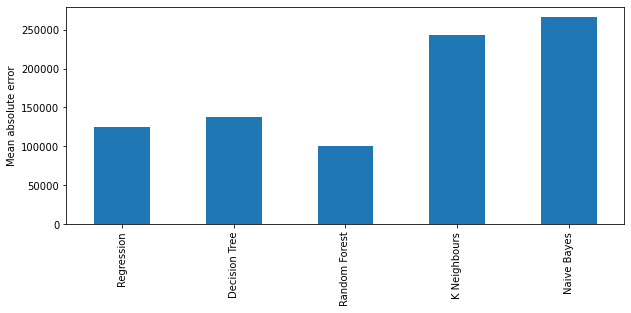

In [78]:
row = finals.iloc[0]
plt.figure(figsize=(10, 4))
row.plot(kind='bar')
plt.ylabel('Mean absolute error')
plt.show()